# Analise e modelagem do Trabalho Final de Mineração de Dados

### Preparando o ambiente

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve

In [2]:
file_path = 'data/UCMF_preprocessado.csv'
df = pd.read_csv(file_path)

# Visualizar os dados

In [3]:
pd.set_option('display.max_columns', None)
df = df.ffill()
df.head()

,ID,IMC,IDADE,PULSOS,PPA,NORMAL X ANORMAL,B2,FC,HDA1,HDA2,SEXO,Ausente,Contínuo,Diastólico,Sistólico,Grupo 1_motivo2,Grupo 2,Grupo 5_motivo2,Grupo 6_motivo2,Grupo 7,Grupo 1,Grupo 5,Grupo 6
0,1,4.358899,0.113329,0.0,4.0,0,0.0,4.718499,1.0,1.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2,3.741657,0.019803,0.0,4.0,0,0.0,4.852030,4.0,1.0,2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,4.000000,0.009950,0.0,4.0,0,0.0,4.477337,0.0,1.0,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,4,4.358899,0.405465,0.0,4.0,0,0.0,4.521789,0.0,1.0,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,5,4.472136,2.360854,0.0,0.0,0,0.0,4.499810,0.0,1.0,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Generate a heatmap to visualize correlations between the features

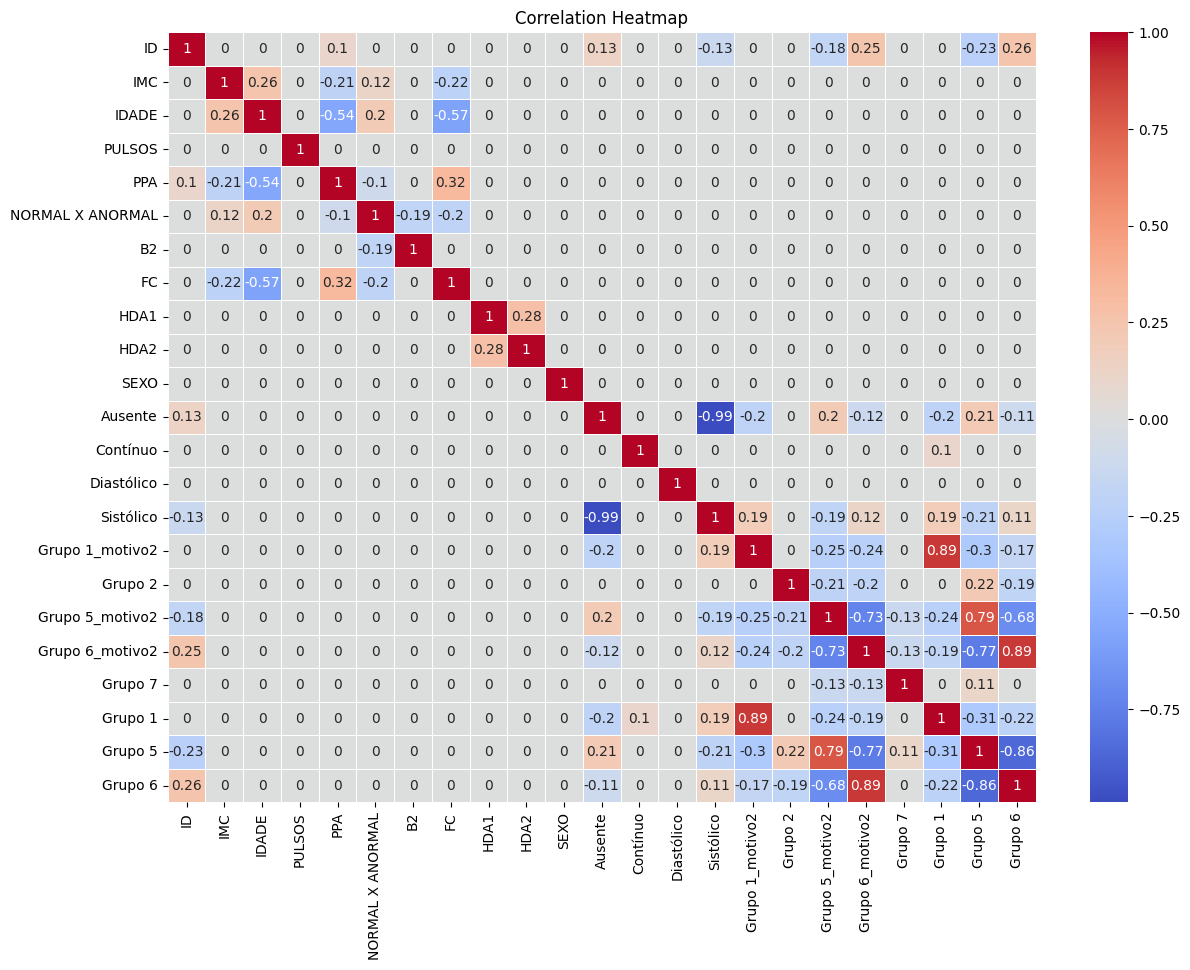

In [4]:
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
rounded_correlation_matrix = correlation_matrix.round(2)
rounded_correlation_matrix[abs(rounded_correlation_matrix) < 0.1] = 0
sns.heatmap(rounded_correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Plotting histograms and boxplots for each numerical feature

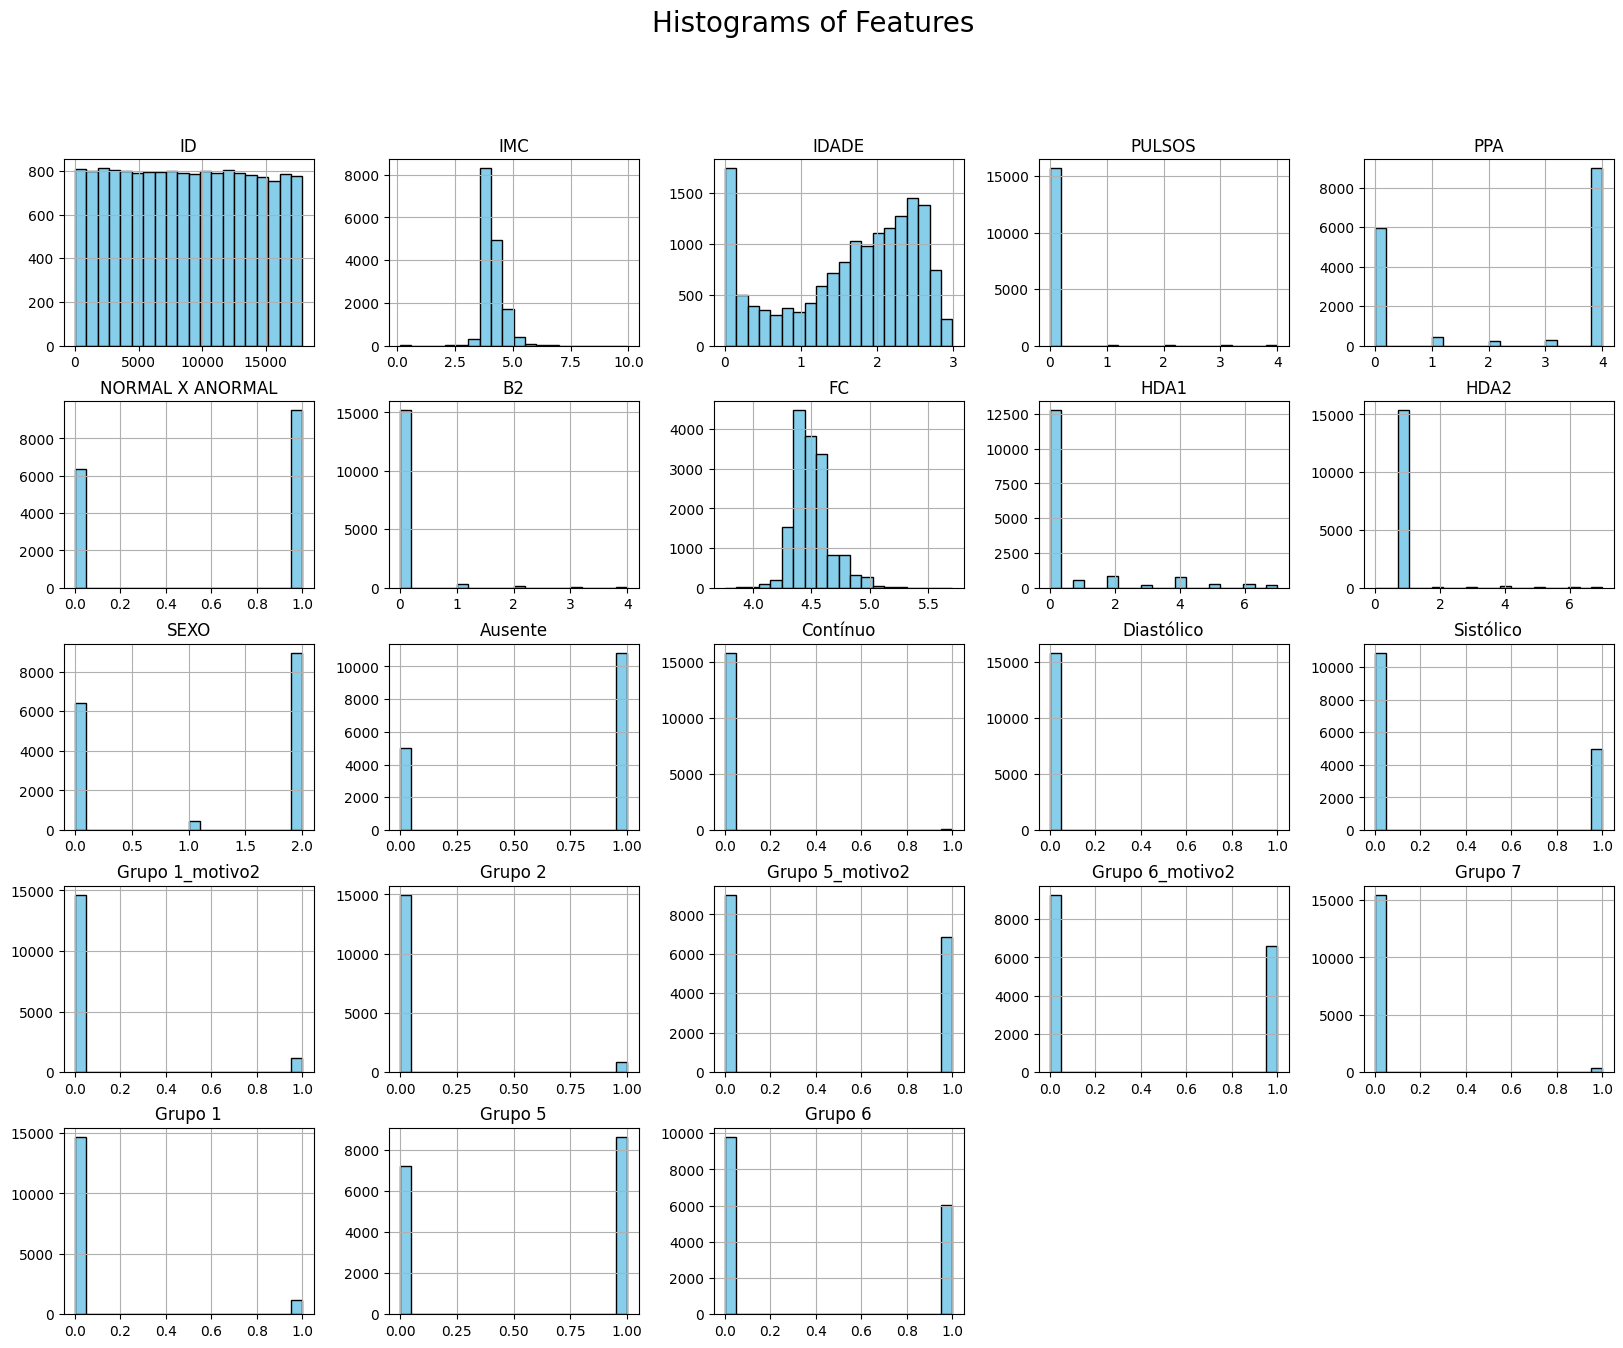

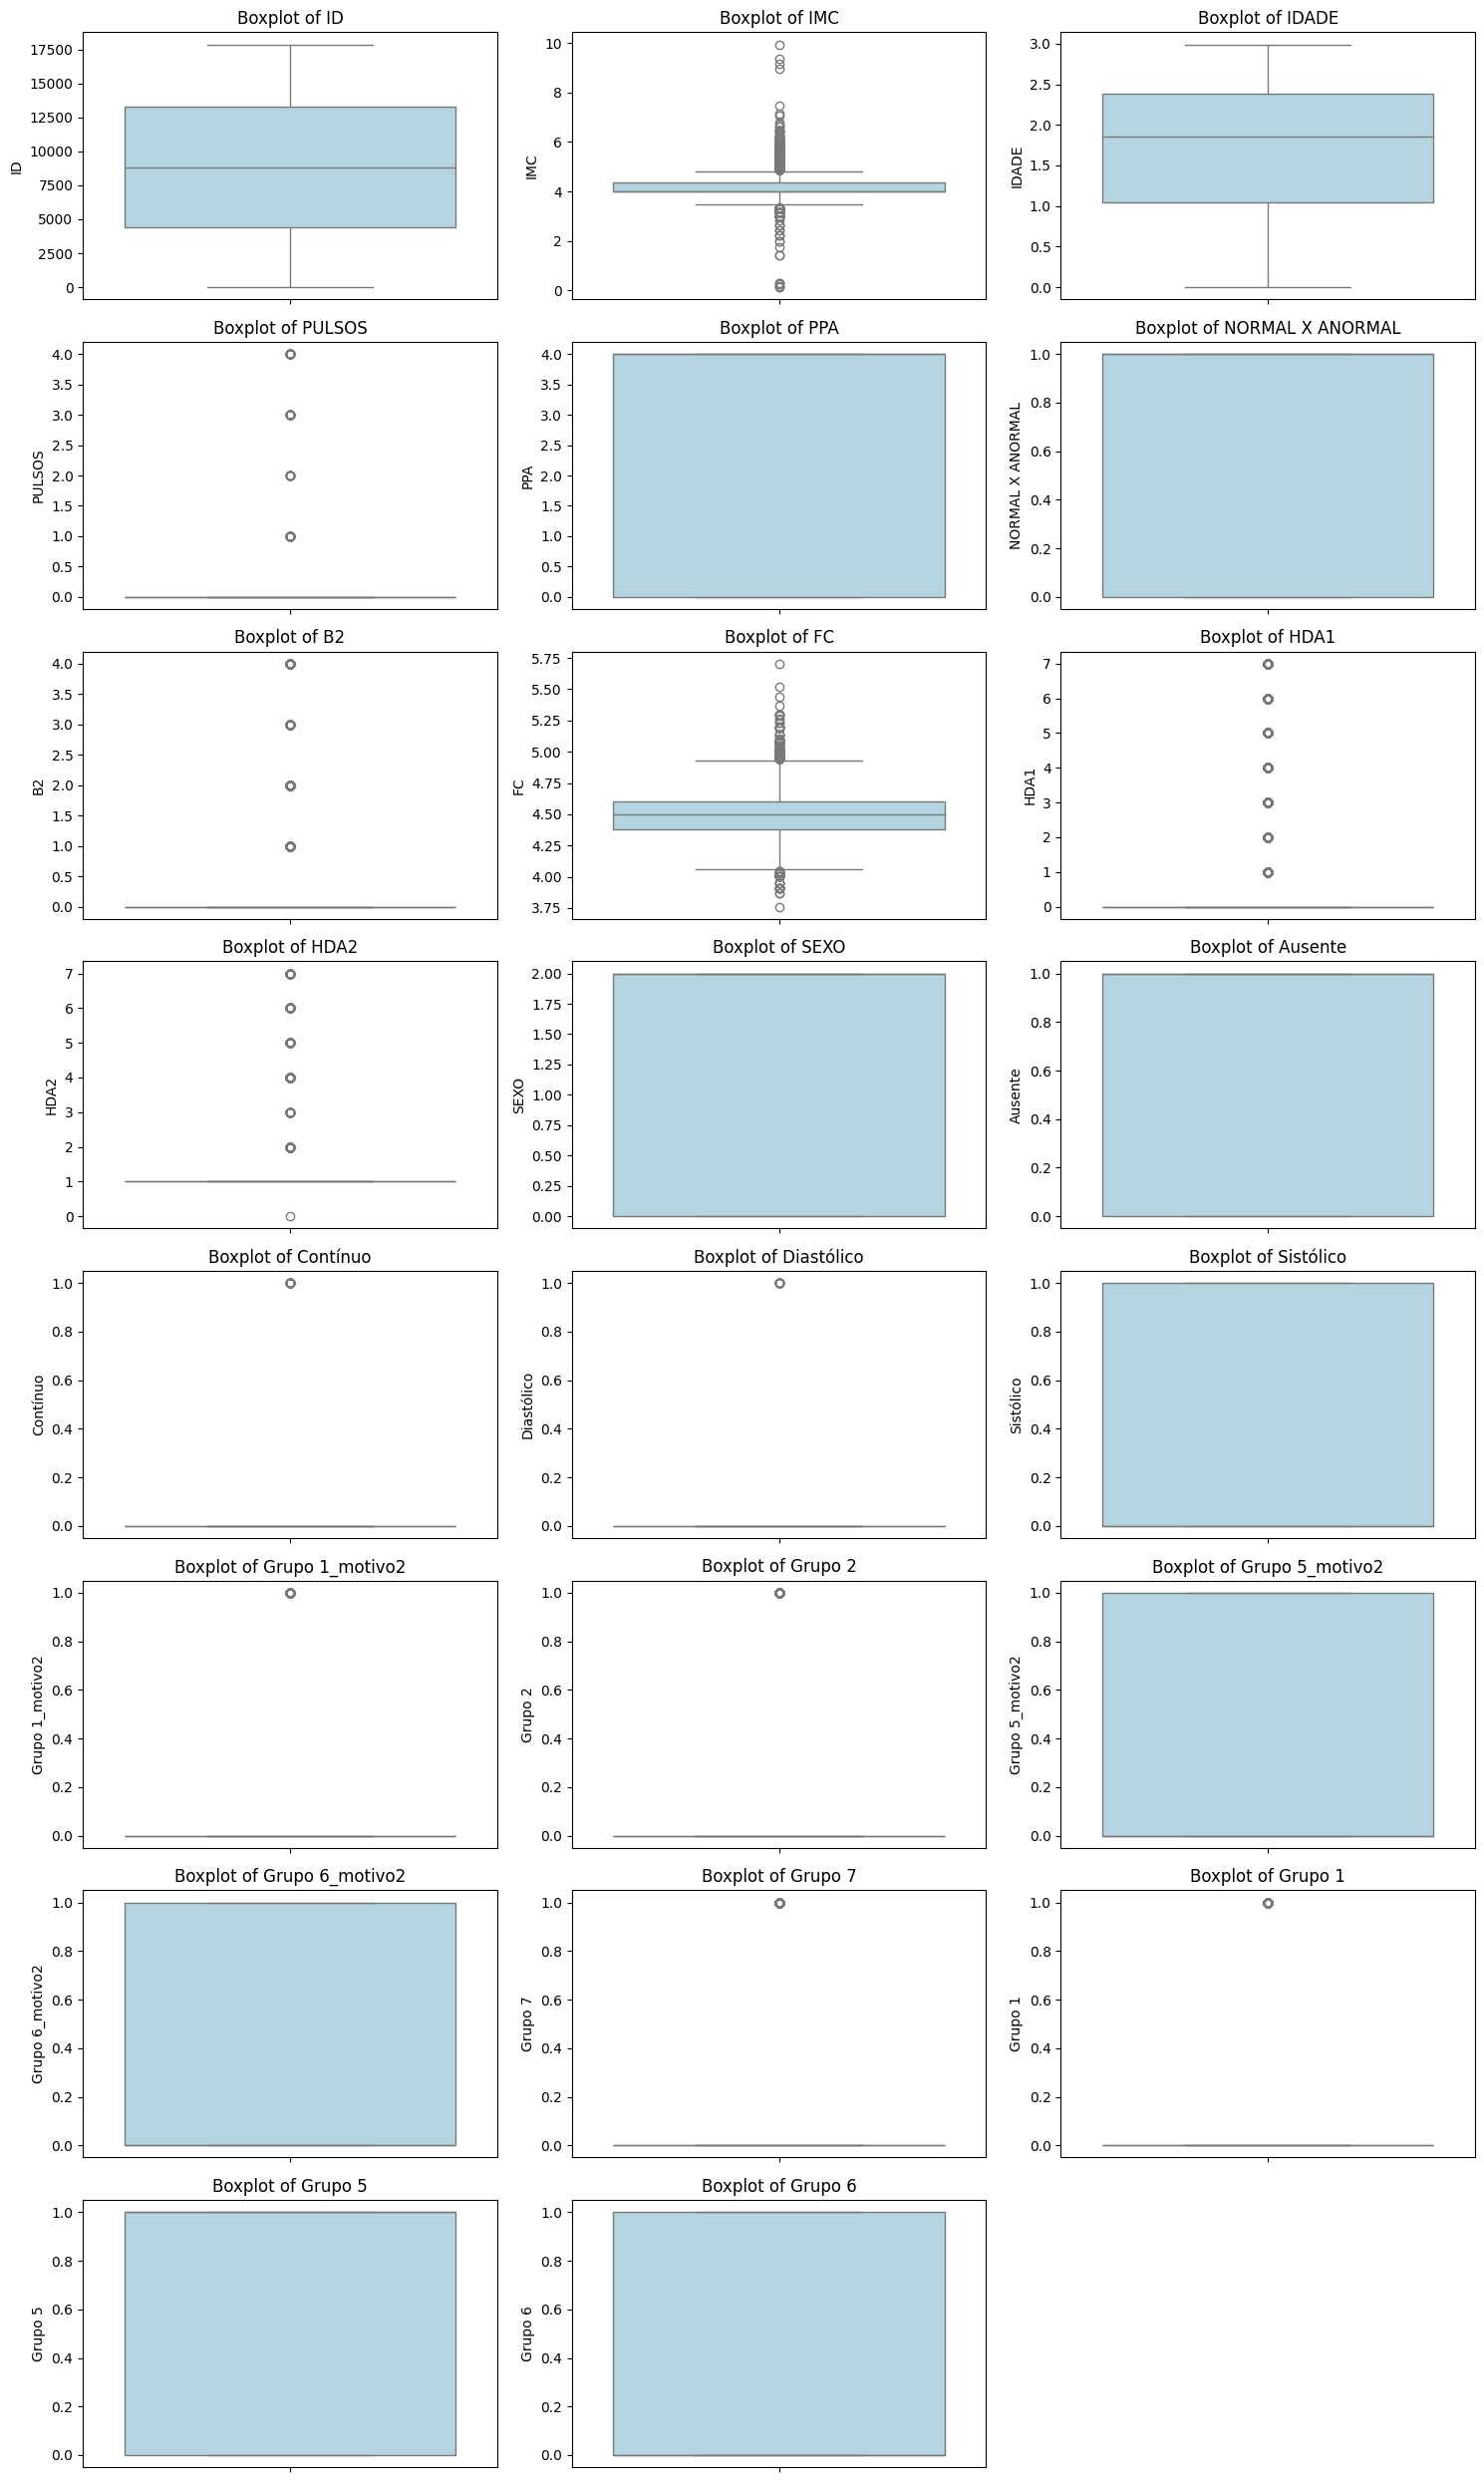

In [5]:
df.hist(bins=20, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Features', fontsize=20)
plt.show()

num_features = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 25))
for i, feature in enumerate(num_features):
    plt.subplot(len(num_features) // 3 + 1, 3, i + 1)
    sns.boxplot(y=df[feature], color='lightblue')
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()

plt.show()

## Arrumando os dados para o modelo

### Dados de analise e target

In [6]:
X = df.drop(columns=["NORMAL X ANORMAL"]).values
y = df["NORMAL X ANORMAL"].values


### Normalizando as features para os classifiers

In [7]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Dividindo em treino e test

30% de teste e 70% de treino

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

### Funções de plot

In [9]:
def plot_confusion_matrix(cm):
    """Exibe a matriz de confusão de forma legível e estilosa."""
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NORMAL', 'ANORMAL'], yticklabels=['NORMAL', 'ANORMAL'], cbar=False)
    plt.xlabel('Predição')
    plt.ylabel('Real')
    plt.title('Matriz de Confusão')
    plt.show()

def plot_roc_curve(model, X_test, y_test):
    """Exibe a curva ROC do modelo."""
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='blue', label='ROC Curve')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()

def plot_precision_recall_curve(model, X_test, y_test):
    """Exibe a curva de Precisão-Recall do modelo."""
    precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.figure(figsize=(6, 6))
    plt.plot(recall, precision, color='blue', label='Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precisão')
    plt.title('Curva de Precisão-Recall')
    plt.legend()
    plt.show()


def plot_feature_importances(model, feature_names):
    """Exibe a importância das características do modelo em um gráfico de barras."""
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title("Importância das Características")
    plt.barh(range(len(importances)), importances[indices], align="center")
    plt.yticks(range(len(importances)), [feature_names[i] for i in indices])
    plt.xlabel("Importância")
    plt.ylabel("Características")
    plt.show()

def plot_confusion_matrix(cm):
    """Exibe a matriz de confusão de forma legível e estilosa."""
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NORMAL', 'ANORMAL'], yticklabels=['NORMAL', 'ANORMAL'], cbar=False)
    plt.xlabel('Predição')
    plt.ylabel('Real')
    plt.title('Matriz de Confusão')
    plt.show()

## Funções de tres modelos:

1. Decision Tree Classifier (com regularizacao)
2. Random Forest Classifier
3. Logistic Regression Classifier

Alem disso, é mostrado metricas como curva ROC, report de metricas gerais, curva de precisõa-recall, matriz de confusão, feature importance em alguns modelos, e na 1 o plot da arvore de decisão

In [10]:
def decision_tree_classifier(X_train, X_test, y_train, y_test, feature_names):
    clf = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5)

    print("Treinando a Árvore de Decisão...")
    clf.fit(X_train, y_train)

    print("Árvore de Decisão Treinada!")
    plt.figure(figsize=(12, 8))
    plot_tree(clf, filled=True, feature_names=feature_names, class_names=['NORMAL', 'ANORMAL'], rounded=True)
    plt.title("Árvore de Decisão")
    plt.show()

    y_pred = clf.predict(X_test)

    print("Decision Tree Classifier:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"AUC-ROC: {roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    print("Matriz de Confusão:")
    plot_confusion_matrix(cm)

    plot_roc_curve(clf, X_test, y_test)

    plot_precision_recall_curve(clf, X_test, y_test)

    plot_feature_importances(clf, feature_names)


def random_forest_classifier(X_train, X_test, y_train, y_test, feature_names):
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print("Random Forest Classifier:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"AUC-ROC: {roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    print("Matriz de Confusão:")
    plot_confusion_matrix(cm)

    plot_roc_curve(clf, X_test, y_test)

    plot_precision_recall_curve(clf, X_test, y_test)

    plot_feature_importances(clf, feature_names)


def logistic_regression_classifier(X_train, X_test, y_train, y_test):
    clf = LogisticRegression(random_state=42, max_iter=200)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print("Logistic Regression:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"AUC-ROC: {roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    print("Matriz de Confusão:")
    plot_confusion_matrix(cm)

    plot_roc_curve(clf, X_test, y_test)

    plot_precision_recall_curve(clf, X_test, y_test)

def plot_confusion_matrix(cm):
    """Exibe a matriz de confusão de forma legível e estilosa."""
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NORMAL', 'ANORMAL'], yticklabels=['NORMAL', 'ANORMAL'], cbar=False)
    plt.xlabel('Predição')
    plt.ylabel('Real')
    plt.title('Matriz de Confusão')
    plt.show()

Treinando a Árvore de Decisão...
Árvore de Decisão Treinada!


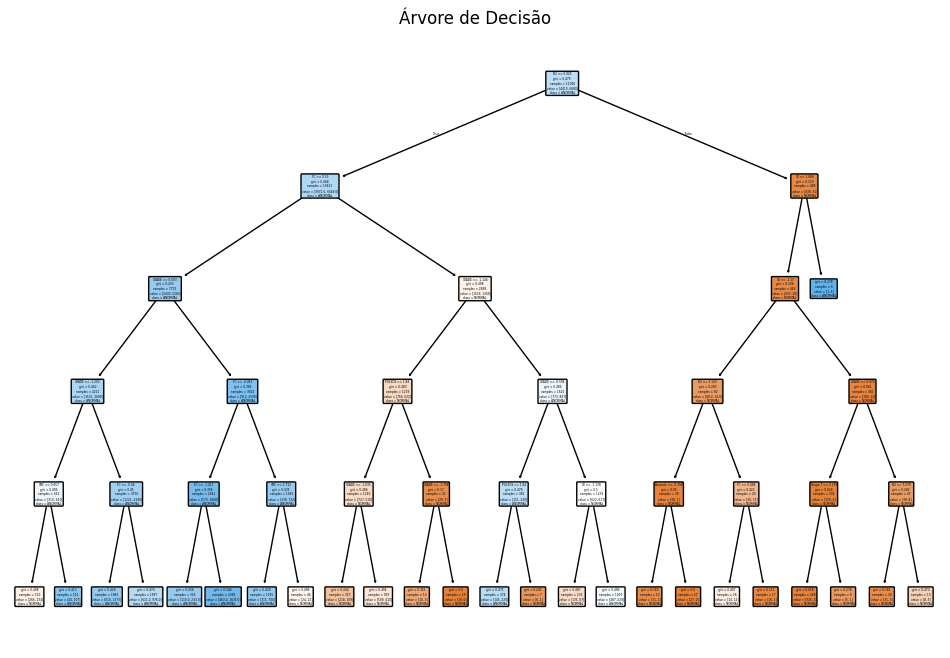

Decision Tree Classifier:
Accuracy: 0.6431727330107301
AUC-ROC: 0.6629021664510337
              precision    recall  f1-score   support

           0       0.61      0.34      0.44      1936
           1       0.65      0.85      0.74      2817

    accuracy                           0.64      4753
   macro avg       0.63      0.60      0.59      4753
weighted avg       0.64      0.64      0.62      4753

Matriz de Confusão:


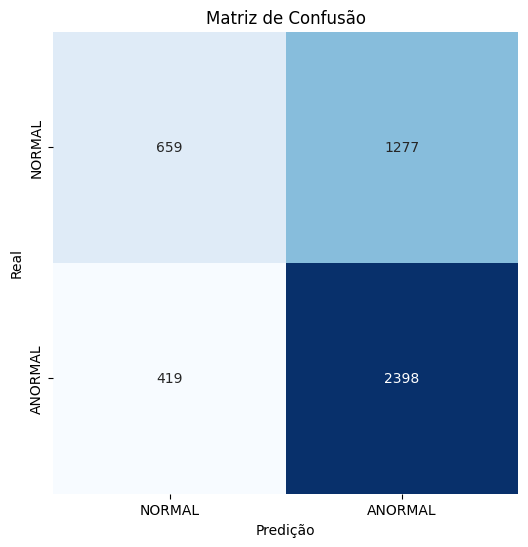

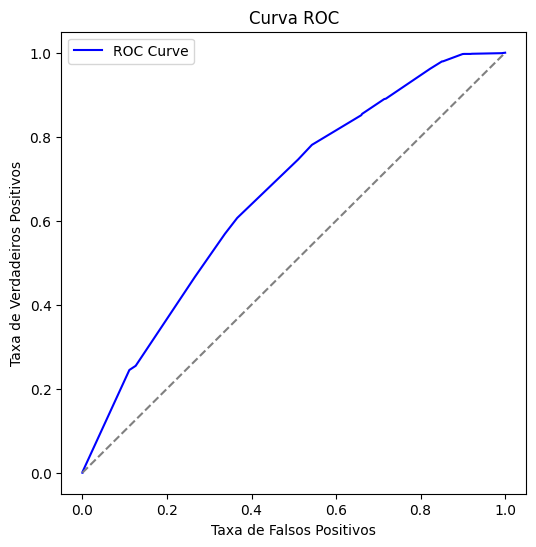

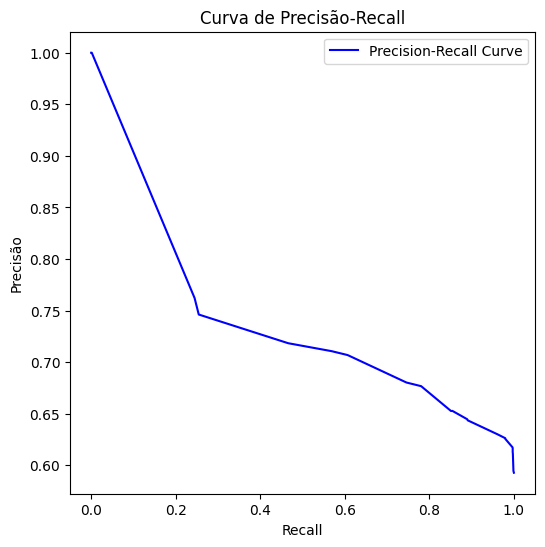

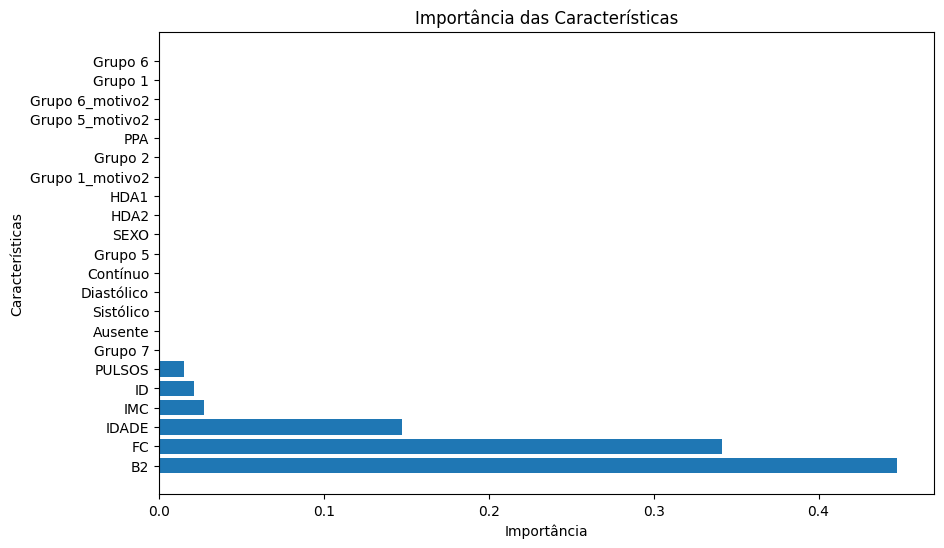

In [11]:
feature_names = df.drop(columns=["NORMAL X ANORMAL"]).columns
decision_tree_classifier(X_train, X_test, y_train, y_test, feature_names)

Random Forest Classifier:
Accuracy: 0.6448558804965285
AUC-ROC: 0.6601259839170092
              precision    recall  f1-score   support

           0       0.59      0.42      0.49      1936
           1       0.67      0.80      0.73      2817

    accuracy                           0.64      4753
   macro avg       0.63      0.61      0.61      4753
weighted avg       0.64      0.64      0.63      4753

Matriz de Confusão:


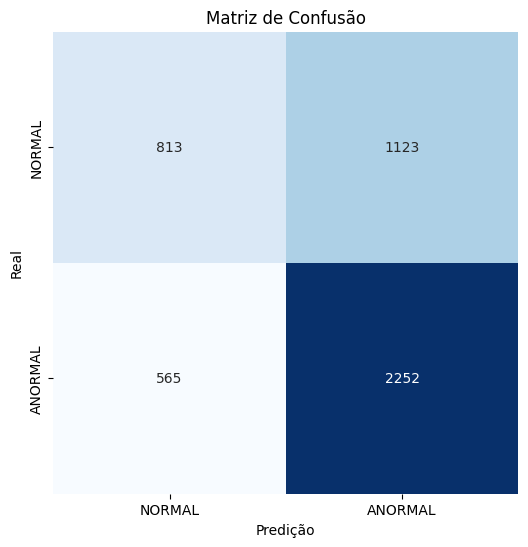

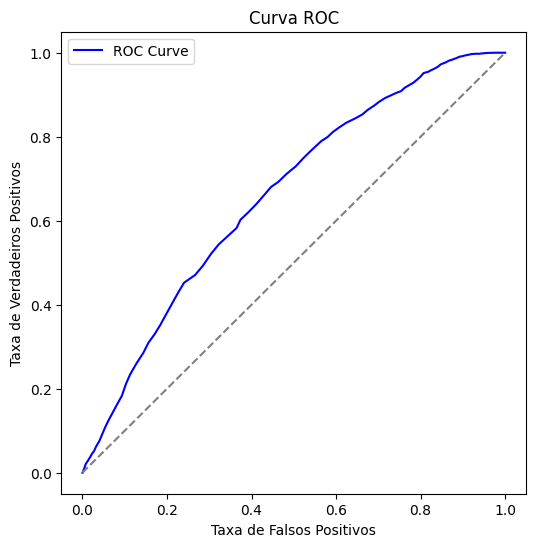

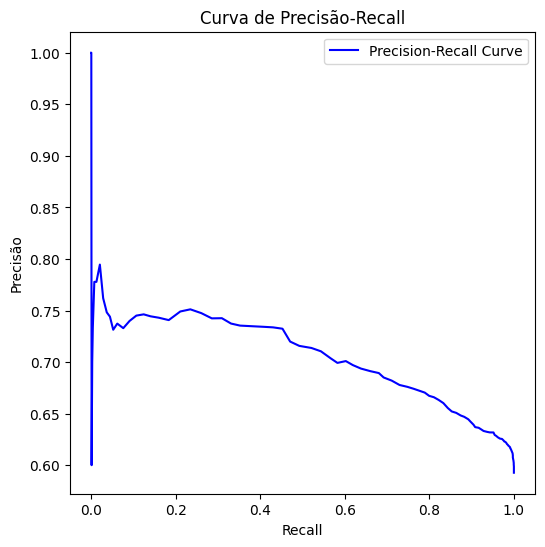

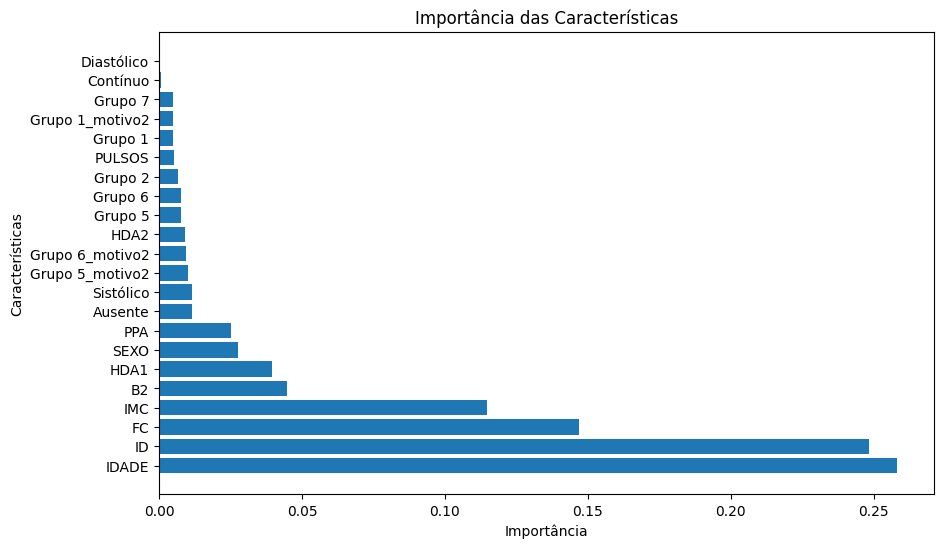

In [12]:
feature_names = df.drop(columns=["NORMAL X ANORMAL"]).columns
random_forest_classifier(X_train, X_test, y_train, y_test, feature_names)

Logistic Regression:
Accuracy: 0.6438039133179044
AUC-ROC: 0.6555593694716553
              precision    recall  f1-score   support

           0       0.65      0.27      0.38      1936
           1       0.64      0.90      0.75      2817

    accuracy                           0.64      4753
   macro avg       0.65      0.59      0.57      4753
weighted avg       0.65      0.64      0.60      4753

Matriz de Confusão:


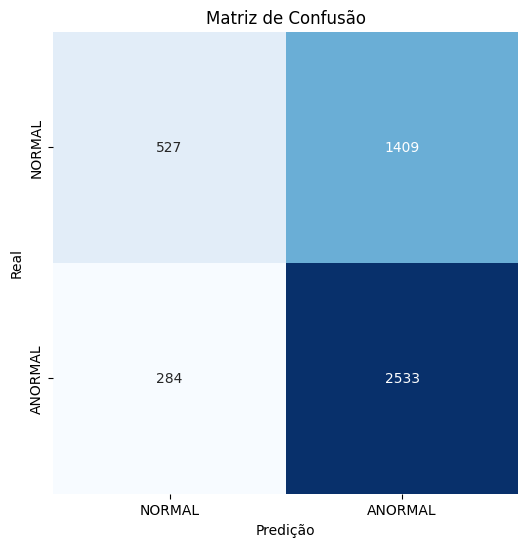

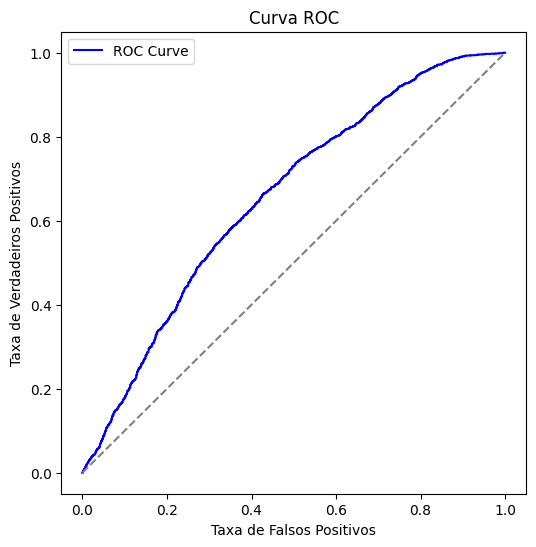

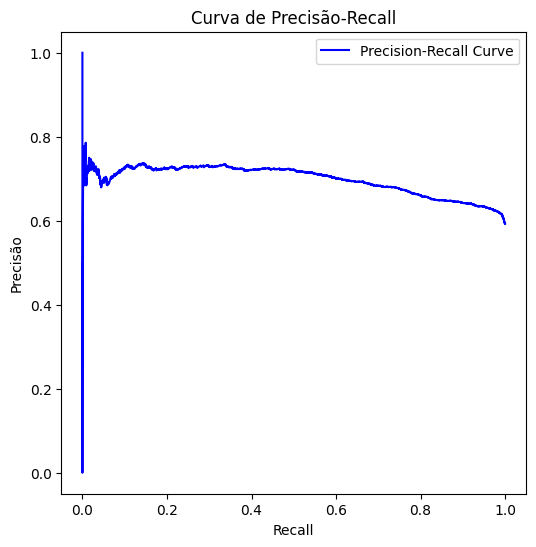

In [13]:
logistic_regression_classifier(X_train, X_test, y_train, y_test)